In [1]:
#load the needed directories
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import seaborn as sns

In [2]:
#load the gender.csv file as a dataframe
df_gender = pd.read_csv('./gender.csv')
df_gender.head()

,auhtor_ID,post,female
0,t2_rnjzutp,Good on you for being responsible! I know self...,1
1,t2_rnjzutp,"must go to the grocery store with their child,...",1
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",1
3,t2_rnjzutp,their app. There's also a program called SYNC ...,1
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",1


In [3]:
#see how many posts we have information on
len(df_gender)

44635

In [4]:
#see how many unique posts we have
len(df_gender['post'].unique())

44635

since the number of unique posts is equal to the number of values in the dataset we can conclude that we have no duplicates in our dataset that we need to account for before dividing into training and test data. 

In [5]:
#from this we can see that we do not have any missing values in the dataset. 
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44635 entries, 0 to 44634
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   auhtor_ID  44635 non-null  object
 1   post       44635 non-null  object
 2   female     44635 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
#see how many authors we have in this dataset
len(df_gender['auhtor_ID'].unique())

2401

In [7]:
#see if the posts are equally divided between female and non
percentage_female_posts = len(df_gender[df_gender['female']==1])/len(df_gender) * 100
percentage_female_posts

46.73014450543296

In [8]:
#create a dataframe containing only the female posts. 
df_female = df_gender[df_gender['female']==1]

#see how many female authors this dataset contains. 
len(df_female['auhtor_ID'].unique())

1281

In [9]:
#see the number of female post
df_female.count()

auhtor_ID    20858
post         20858
female       20858
dtype: int64

In [10]:
#check the division of non-female and female, so here we show the proportion of female authors. 
1281/2401 * 100

53.352769679300295

In [11]:
#create a dataframe for the non-female posts
df_non_female = df_gender[df_gender['female']==0]
df_non_female.head()

,auhtor_ID,post,female
17,t2_2ht4n2g,It also looks like you need a trim as well and...,0
18,t2_2ht4n2g,or it dint happen The Enter-taint-ment industr...,0
19,t2_bbe41,Mall of The Netherlands near The Hague is an A...,0
20,t2_bbe41,cause a person to support one form of disrespe...,0
21,t2_bbe41,"the benefits of being in the EU, the same voti...",0


In [12]:
#see how many non female datapoints we have. 
df_non_female.count()

auhtor_ID    23777
post         23777
female       23777
dtype: int64

In [ ]:
# add the number of words in a post to see if all posts are approximately the same length or if non female posts are maybe
# longer or shorter than female posts
i = 0
df_gender['num_words'] = 0
while i < len(df_gender):
    df_gender['num_words'][i] = len(df_gender['post'][i].split())
    i += 1

In [14]:
#again divide between female and non-female for two seperate dataframes and check how many different lengths they have. 
df_female = df_gender[df_gender['female']==1]
print(len(df_female['num_words'].unique()))
df_non_female = df_gender[df_gender['female']==0]
print(len(df_non_female['num_words'].unique()))

681
618


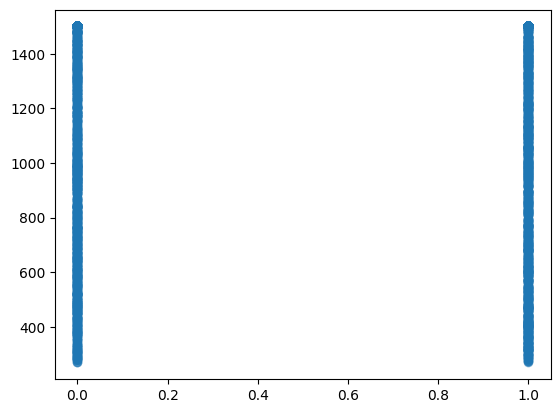

In [15]:
#show the difference in lengths of posts in a scatter plot to see if there are any differences between the genders. 
plt.scatter(df_gender['female'], df_gender['num_words'], alpha=0.5)
plt.show()

As seen in the scatterplot, they are very similar and on no differences can be spotted. Therefore, we continued to take a look at the differences with the describe() function.

In [16]:
df_female['num_words'].describe()

count    20858.000000
mean      1469.523492
std        155.868470
min        269.000000
25%       1500.000000
50%       1500.000000
75%       1500.000000
max       1500.000000
Name: num_words, dtype: float64

In [17]:
df_non_female['num_words'].describe()

count    23777.000000
mean      1476.836523
std        135.350944
min        271.000000
25%       1500.000000
50%       1500.000000
75%       1500.000000
max       1500.000000
Name: num_words, dtype: float64

In [18]:
shortest_f = df_female[df_female['num_words']==269]
shortest_n = df_non_female[df_non_female['num_words']==271]
f=shortest_f['post'][25681]
n= shortest_n['post'][40084]
print(f'{n} /n/n {f}')

empty. Very very empty. But in that empty nothing there is everything. &amp;#x200B; &gt;You’re being overly specific and I’m talking generalities man. OK, in what way is the first statement generally true? We know it's not true in scientific terms, because even the most rarefied physical space is filled with the quantum vacuum. It's not empty philosophically, because it is constructed from concepts that exist in our minds. The instant you consider a space that is empty, it is inserted into an ontological structure. Is it empty psychologically perhaps? Depends on how you define empty. An empty glass is full of air...so it's full. An empty head still has electrical activity going on; ideas. So-called empty calories are energy dense. How else is it empty? I guess in the mind of a nihilist, but that's just impractical semantics. Excellently necessary point! Someone needs to rename this page then: [url It seems like there’s a conflict. On the one hand you know you are sexually attracted to 

In [19]:
#hard to see the different posts, so decided to print them seperately
print(n)


empty. Very very empty. But in that empty nothing there is everything. &amp;#x200B; &gt;You’re being overly specific and I’m talking generalities man. OK, in what way is the first statement generally true? We know it's not true in scientific terms, because even the most rarefied physical space is filled with the quantum vacuum. It's not empty philosophically, because it is constructed from concepts that exist in our minds. The instant you consider a space that is empty, it is inserted into an ontological structure. Is it empty psychologically perhaps? Depends on how you define empty. An empty glass is full of air...so it's full. An empty head still has electrical activity going on; ideas. So-called empty calories are energy dense. How else is it empty? I guess in the mind of a nihilist, but that's just impractical semantics. Excellently necessary point! Someone needs to rename this page then: [url It seems like there’s a conflict. On the one hand you know you are sexually attracted to 

In [20]:
print(f)

a “fluffy” woman and I appreciate your honesty. I don’t expect everyone to be attracted to me nor am I attracted to everyone I meet. I would much rather have honest pictures so you can decide if I’m too big or not your type for whatever reason. Having said that, I’m starting with a trainer this week so while I would definitely not put pictures online today…in 3 months I might rethink that. I haven’t dated since COVID and not getting any younger!! S-Town is my all time favorite and has gotten me through multiple road trips awake! Wait until the first leaves (the cotyledon) start to die. Thank you!! He made fun of a trans woman getting coffee at the coffee shop where we met. I tried explaining that wasn’t cool with me, and he listened intently while I explained how I felt…that nobody asks to be misgendered and we should celebrate her bravery to be who she is inside. We talked about biological differences and I thought he was actually listening. But his final words: “you’ve gotta admit it

In [21]:
print(df_female['post'][0])

Good on you for being responsible! I know self-discipline is difficult, but it's good that you've got your priorities in order. Good luck on your finals. I'm sorry that happened. I think the people who said that genuinely believed it was the best option for you so I can't be too mad at them. I posted below and I'll say it again: that 0 tolerance response is likely due to trauma and stress involving some sort of mistreatment those people endured in the past. They're not saying it to be malicious, they're just saying it because that's the measure they would feel is necessary to protect themselves if they were in that situation. It's their own way of looking out for you, just how I suggested talking it out. I'm happy the two of you did talk and that he made it up to you, and I hope your relationship continues to be happy and healthy. Sending love and light 🕯️💗 They're both single so I don't understand why they have to hide their relationship. I never have understood it. Also, the fact tha

In [22]:
df_non_female.head()

,auhtor_ID,post,female,num_words
17,t2_2ht4n2g,It also looks like you need a trim as well and...,0,1500
18,t2_2ht4n2g,or it dint happen The Enter-taint-ment industr...,0,551
19,t2_bbe41,Mall of The Netherlands near The Hague is an A...,0,1500
20,t2_bbe41,cause a person to support one form of disrespe...,0,1500
21,t2_bbe41,"the benefits of being in the EU, the same voti...",0,1500


In [23]:
df_non_female['post'][17]

"It also looks like you need a trim as well and it will look better Tattoos usually take 10 days to heal and then usually settles in 14-25 days. The wait is usually for healing + to see the immune response on how body handles the ink under the skin. Some people fade more or lose the ink and really depends Also some artists even wait 1 month between sessions for best result I (28M) get absolute joy going down on women. I look forward to it . I met this woman in her late 30s a few months back. After a fee drinks , a bit of foreplay , i slowly moved down , kissing as i go along to slowly ease into it . She was beautiful and her pussy looked and smelled amazing .I start, and it slowly intensified and we moved into a 69 position. As i spread the cheeks to better position my tongue , I SEE IT. A little piece of dried out SHIT stuck tight on her asshole . It really caught me off-guard and i dint know what to do next I excused myself a minute later , acted like i got an important text from a f

as seen above there seems to be only a very slight difference in length of posts for female and non female, non_female posts are slightly longer, although their 1st, 2nd, 3rd and 4th quartile are identical. So there is only a small change in the smallest 25 % of their posts. And also the shortest posts are very close. For female posts the shortest consists of 269 words while for non female it consists of 271 words, so there is only a difference of 2 words.

If we look at both long and shorter posts, we can see that the posts only contain a part of the post and are not finished within one datapoint. Also we see that they talk a lot about their own personal experiences. 

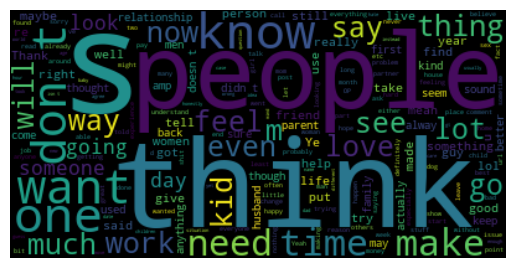

In [24]:
#generate 1 text containing all female texts
female_text = ' '.join(df_female['post'])

#generate the wordcloud for the female posts. 
wordcloud = WordCloud().generate(female_text)

#show the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

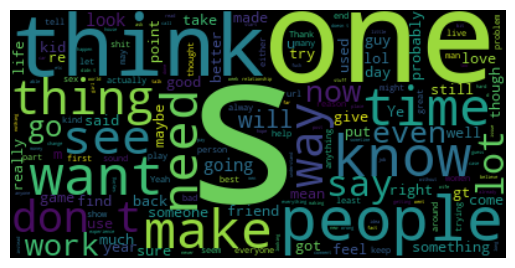

In [25]:
#generate 1 text containing all non-female texts
non_female_text = ' '.join(df_non_female['post'])

#generate the wordcloud for the non-female posts. 
wordcloud = WordCloud().generate(non_female_text)

#show the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
i = 0
df_gender['sentiment'] = 0
while i < len(df_gender):
    df_gender['sentiment'][i] = TextBlob(df_gender['post'][i]).sentiment.polarity
    i += 1

C:\Users\20224435\AppData\Local\Temp\ipykernel_31860\3919516257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['sentiment'][i] = TextBlob(df_gender['post'][i]).sentiment.polarity
C:\Users\20224435\AppData\Local\Temp\ipykernel_31860\3919516257.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0796600209686147' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_gender['sentiment'][i] = TextBlob(df_gender['post'][i]).sentiment.polarity


In [ ]:
df_gender.head()

In [ ]:
#see what stopwords are included in the stopword part of the wordcloud package. 
stopwords = set(STOPWORDS)
print(stopwords)

In [ ]:
wordcloud = WordCloud(stopwords=stopwords).generate(non_female_text)
#show wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wordcloud = WordCloud(stopwords=stopwords).generate(female_text)
#show wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

non female text are more likely to use one in their text while female are more like to use know and think is also a bit bigger in the female stopword wordcloud then it is in the non-female version. We can see that need and people are common in both. Since both wordclouds and the stopword wordclouds are very similar it seems like the text do not differ much across female and non female text

In [ ]:
#again division between female and non-female because the sentiment was added to the combined dataframe. 
df_female = df_gender[df_gender['female']==1]
df_non_female = df_gender[df_gender['female']==0]

In [ ]:
# Creating subplots to show both histograms
fig, ax = plt.subplots(nrows=2, ncols=1, squeeze=False, sharey=True, sharex=True, figsize = (6,10))

#female sentiment of posts histogram
sns.histplot(df_female['sentiment'], bins=20, ax=ax[0,0])
ax[0,0].set_title('female posts')
ax[0,0].set_xlabel('Sentiment score')
ax[0,0].set_ylabel('frequency')

#non-female sentiment of posts histogram
sns.histplot(df_non_female['sentiment'], bins=20, ax=ax[1,0])
ax[1,0].set_title('non-female posts')
ax[1,0].set_xlabel('Sentiment score')
ax[1,0].set_ylabel('frequency')

fig.suptitle('sentiment scores for reddit posts', fontsize = 18, fontweight='bold');

In [ ]:
#look for difference in sentiment for non-female posts. 
df_gender[df_gender['female'] == 0]['sentiment'].describe()

In [ ]:
#look for difference in sentiment for female posts. 
df_gender[df_gender['female'] == 1]['sentiment'].describe()

we can see that the sentiment of female posts is slightly higher than that of non-female posts
